![](pics/header.jpg)

# AI Programming with Python: Activation Functions

Kevin J. Walchko, Phd

26 Mar 2022

---

Here are some activation functions which I have seen commonly used in this course. However, there are many other functions I have yet to use.

In [1]:
from torch import nn
import torch
import numpy as np
from matplotlib import pyplot as plt

## Sigmoid

The sigmoid is typically the first activation function you learn since it is easy. Its dervative is straight forward and easy to learn.

$$
Sigmoid(x) = \sigma(x) = \frac {1}{1+e^{−x}} \\
Sigmoid'(x) = \frac {\partial}{\partial x} \sigma(x) = \sigma(x) (1 - \sigma(x)) \\
LogSigmoid(x) = \log \left( \frac {1}{1+e^{−x}} \right)
$$

- **Vanishing Gradient Problem:** the sigmoid function in back propagation has a maximum value of 0.25 and therefore reduces the change by 75%. If a network has a lot of hidden layers with sigmoids, then the weight updates will be reduced by 75% in *each* layer of the network and eventually reduces to 0 as more hidden layers are added. This is why for deep learning networks, we won't use this.
    - See sigmoid prime function plot below showing the maximum value is 0.25.

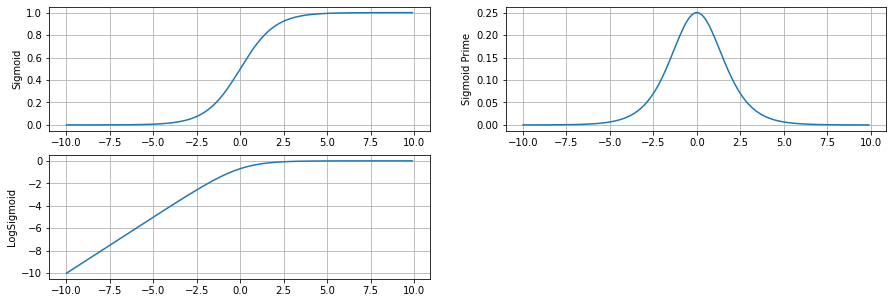

In [2]:
def sigmoid():
    # Derivative of the sigmoid function
    def sigmoid_prime(x):
        x = torch.from_numpy(x)
        return sig(x) * (1 - sig(x))

    x = np.arange(-10,10,0.1)
    sig = nn.Sigmoid()
    s = sig(torch.from_numpy(x))
    sp = sigmoid_prime(x)
    logsig = nn.LogSigmoid()
    ls = logsig(torch.from_numpy(x))

    plt.figure(figsize=(15,5))
    plt.subplot(2,2,1)
    plt.plot(x,s)
    plt.ylabel("Sigmoid")
    plt.grid(True);

    plt.subplot(2,2,2)
    plt.plot(x,sp)
    plt.ylabel("Sigmoid Prime")
    plt.grid(True);
    
    plt.subplot(2,2,3)
    plt.plot(x,ls)
    plt.ylabel("LogSigmoid")
    plt.grid(True);
    
sigmoid()

## Rectified Linear Unit (ReLU)

The ReLu is:

- Faster to compute than the sigmoid and this also holds true for the derivative too
- Can be used in networks with many layers and is typically the default for MLPs and CNNs
    - Not typically used with RNNs
- Helps overcome the vanishing gradient problem

$$
ReLU(x) = x^+ = \max(0, x) \\
ReLU'(x) = \frac {\partial}{\partial x} ReLU(x) = \begin{cases}
1 & x > 0 \\
0 & x < 0
\end{cases}
$$

Leaky ReLu helps:

- Also helps with vanishing gradient problem, since there is a value in the negative region
- Can help speed up training because of the small negative value

$$
LeakyReLU(x) = \begin{cases}
x & x \ge 0\\
slope \cdot x & otherwise
\end{cases} \\
LeakyReLU'(x) = \frac {\partial}{\partial x} LeakyReLU(x) = \begin{cases}
1 & x > 0 \\
slope & x < 0
\end{cases}
$$

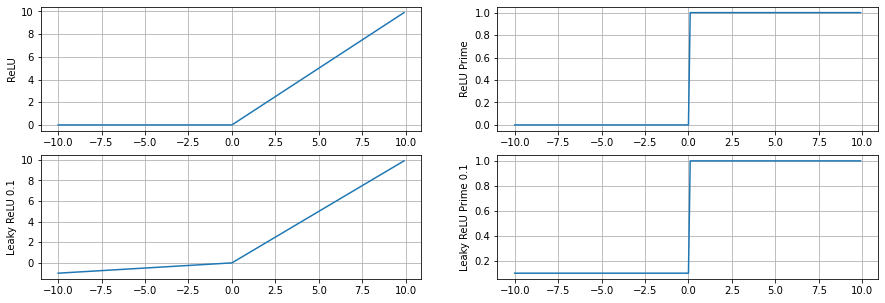

In [29]:
def relu(c):
    def relu_prime(x):
        f = lambda x: 1 if x > 0 else 0
        return np.array([f(i) for i in x])
    
    def leaky_relu_prime(x,c):
        f = lambda x: 1 if x > 0 else c
        return np.array([f(i) for i in x])
    
    x = np.arange(-10,10,0.1)
    re = nn.ReLU()
    r = re(torch.from_numpy(x))
    rp = relu_prime(x)
    lre = nn.LeakyReLU(c)
    lrex = lre(torch.from_numpy(x))
    lrp = leaky_relu_prime(x,c)

    plt.figure(figsize=(15,5))
    plt.subplot(2,2,1)
    plt.plot(x,r)
    plt.ylabel("ReLU")
    plt.grid(True);

    plt.subplot(2,2,2)
    plt.plot(x,rp)
    plt.ylabel("ReLU Prime")
    plt.grid(True);
    
    plt.subplot(2,2,3)
    plt.plot(x,lrex)
    plt.ylabel(f"Leaky ReLU {c}")
    plt.grid(True);
    
    plt.subplot(2,2,4)
    plt.plot(x,lrp)
    plt.ylabel(f"Leaky ReLU Prime {c}")
    plt.grid(True);

    
relu(0.1)

## Softmax



$$
Softmax(x_i) = \frac {e^{x_i}}{\sum_j e^{x_j}} \\
LogSoftmax(x_i) =  \log \left( \frac {e^{x_i}}{\sum_j e^{x_j}} \right)
$$

> Suggest using the `nn.LogSoftmax` since it is faster and has better numerical stability. Also, you can use `nn.LogSoftmax` with `nn.NLLLoss` for training. 

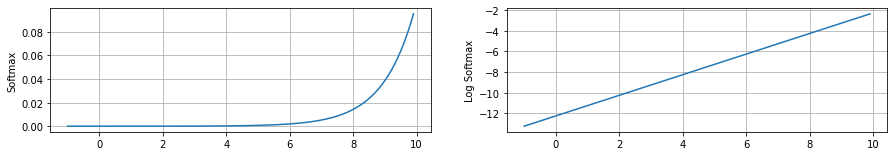

In [39]:
def softmax():
    m = nn.Softmax(dim=0)
    lm = nn.LogSoftmax(dim=0)
    x = torch.arange(-1,10,.1)
    sm = m(x)
    slm = lm(x)
    
    plt.figure(figsize=(15,5))
    plt.subplot(2,2,1)
    plt.plot(x,sm)
    plt.ylabel("Softmax")
    plt.grid(True);

    plt.subplot(2,2,2)
    plt.plot(x,slm)
    plt.ylabel("Log Softmax")
    plt.grid(True);
    
softmax()